<a href="https://colab.research.google.com/github/SophiaBieri/MLfEA-Project-2-Submission/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for Economic Analysis: Traffic accidents in the UK 2005 - 2019

In [ ]:
# Import Packages
import os
import glob
import pandas as pd
import numpy as np
import urllib.request                     # HTTP downloader
from zipfile import ZipFile               # ZIP file decompressor
import matplotlib.pyplot as plt           # plotting
import warnings
warnings.filterwarnings("ignore")

# Collection of Raw data

In [ ]:
# Create a path to the folder containing all csv files
path = 'uktraffic/'

print(f'Working directory: \t {os.getcwd()}')
print(f'Data directory: \t {os.getcwd()}/{path}')

Working directory: 	 /content
Data directory: 	 /content/uktraffic/


Download the ZIP data files:

In [ ]:
# Create a data folder
os.makedirs(path, exist_ok=True)

def download(url, target):
    """ URL download function - stores the file into the `uktraffic` folder. """
    filename = os.path.split(url)
    target = os.path.join(target, filename[1])
    urllib.request.urlretrieve(url, target)
    return target
    
# download ZIP files and decompress if not already done
if not os.path.isfile(path + '2018/dftRoadSafetyData_Accidents_2018.csv'):
    zips = [
        # 2005-2014
        ['0514', download('http://data.dft.gov.uk.s3.amazonaws.com/road-accidents-safety-data/Stats19_Data_2005-2014.zip', path)],
        # 2015
        ['2015', download('http://data.dft.gov.uk/road-accidents-safety-data/RoadSafetyData_2015.zip', path)],
        # 2016
        ['2016', download('http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Casualties_2016.zip', path)],
        ['2016', download('http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Vehicles_2016.zip', path)],
        ['2016', download('http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafety_Accidents_2016.zip', path)],
        # 2017
        ['2017', download('http://data.dft.gov.uk.s3.amazonaws.com/road-accidents-safety-data/dftRoadSafetyData_Vehicles_2017.zip', path)],
        ['2017', download('http://data.dft.gov.uk.s3.amazonaws.com/road-accidents-safety-data/dftRoadSafetyData_Casualties_2017.zip', path)],
        ['2017', download('http://data.dft.gov.uk.s3.amazonaws.com/road-accidents-safety-data/dftRoadSafetyData_Accidents_2017.zip', path)],
        # 2019
        ['2019', download('http://data.dft.gov.uk/road-accidents-safety-data/DfTRoadSafety_Accidents_2019.zip', path)],
        ['2019', download('http://data.dft.gov.uk/road-accidents-safety-data/DfTRoadSafety_Vehicles_2019.zip', path)],
        ['2019', download('http://data.dft.gov.uk/road-accidents-safety-data/DfTRoadSafety_Casualties_2019.zip', path)]
    ]
    
    # 2018
    os.makedirs(path + '2018', exist_ok=True)
    download('http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Accidents_2018.csv', path + '2018')
    download('http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Casualties_2018.csv', path + '2018')
    download('http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Vehicles_2018.csv', path + '2018')
    
    # unzip files
    for item in zips:
        os.makedirs(path + item[0], exist_ok=True)
        with ZipFile(item[1], 'r') as z: z.extractall(path + item[0])  # extract zip
        os.remove(item[1])  # delete zip file
        
# list all CSV files
glob.glob(path + '/**/*.csv', recursive=True)

['uktraffic/0514/Accidents0514.csv',
 'uktraffic/0514/Vehicles0514.csv',
 'uktraffic/0514/Casualties0514.csv',
 'uktraffic/2018/dftRoadSafetyData_Accidents_2018.csv',
 'uktraffic/2018/dftRoadSafetyData_Casualties_2018.csv',
 'uktraffic/2018/dftRoadSafetyData_Vehicles_2018.csv',
 'uktraffic/2015/Accidents_2015.csv',
 'uktraffic/2015/Casualties_2015.csv',
 'uktraffic/2015/Vehicles_2015.csv',
 'uktraffic/2017/Cas.csv',
 'uktraffic/2017/Acc.csv',
 'uktraffic/2017/Veh.csv',
 'uktraffic/2016/Cas.csv',
 'uktraffic/2016/dftRoadSafety_Accidents_2016.csv',
 'uktraffic/2016/Veh.csv',
 'uktraffic/2019/Road Safety Data- Vehicles 2019.csv',
 'uktraffic/2019/Road Safety Data - Casualties 2019.csv',
 'uktraffic/2019/Road Safety Data - Accidents 2019.csv']

# Data Preprocessing (download, parse, merge)

In the next step we load all columns of interest from the data files and merge the files of all years:

## Accidents

In [ ]:
cols = {'Accident_Index': str,
        #'Longitude': float,
        #'Latitude': float,
        'Accident_Severity': int,
        'Number_of_Vehicles': int,
        #'Number_of_Casualties': int,
        'Date': str,
        'Time': str,
        '1st_Road_Class': int,
        #'1st_Road_Number': int,
        #'Road_Type': int,
        'Speed_limit': float,
        'Junction_Detail': int,
        #'Junction_Control': int,
        #'2nd_Road_Class': int,
        #'2nd_Road_Number': int,
        'Light_Conditions': int,
        'Weather_Conditions': int,
        'Road_Surface_Conditions': int,
        #'Special_Conditions_at_Site': int,
        'Urban_or_Rural_Area': int}

files = [
    path + '0514/Accidents0514.csv',
    path + '2015/Accidents_2015.csv',
    path + '2016/dftRoadSafety_Accidents_2016.csv',
    path + '2017/Acc.csv',
    path + '2018/dftRoadSafetyData_Accidents_2018.csv',
    path + '2019/Road Safety Data - Accidents 2019.csv'
]

# load files as pandas.DataFrame
pds = [pd.read_csv(f, usecols=list(cols.keys()), dtype=cols, parse_dates=['Date'], dayfirst=True) for f in files]

# merge accidents files for all years
acc = pd.concat(pds, ignore_index=True)

## Casualties

In [ ]:
cols = {'Accident_Index': str,
        'Vehicle_Reference': int,
        'Casualty_Reference': int,
        'Casualty_Class': int,
        'Sex_of_Casualty': int,
        'Age_of_Casualty': int,
        'Casualty_Severity': int}

files = [
    path + '0514/Casualties0514.csv',
    path + '2015/Casualties_2015.csv',
    path + '2016/Cas.csv',
    path + '2017/Cas.csv',
    path + '2018/dftRoadSafetyData_Casualties_2018.csv',
    path + '2019/Road Safety Data - Casualties 2019.csv'
]

# load files as pandas.DataFrame
pds = [pd.read_csv(f, usecols=list(cols.keys()), dtype=cols) for f in files]

# merge casualties files for all years
cas = pd.concat(pds, ignore_index=True)

## Vehicles

In [ ]:
cols = {'Accident_Index': str,
        'Vehicle_Reference': int,
        'Vehicle_Type': int,
        #'Vehicle_Manoeuvre': int,
        #'Junction_Location': int,
        #'Skidding_and_Overturning': int,
        #'Was_Vehicle_Left_Hand_Drive?': int,
        #'Journey_Purpose_of_Driver': int,
        'Sex_of_Driver': int,
        'Age_of_Driver': int,
        'Engine_Capacity_(CC)': int,
        #'Propulsion_Code': int,
        'Age_of_Vehicle': int}

files = [
    path + '0514/Vehicles0514.csv',
    path + '2015/Vehicles_2015.csv',
    path + '2016/Veh.csv',
    path + '2017/Veh.csv',
    path + '2018/dftRoadSafetyData_Vehicles_2018.csv',
    path + '2019/Road Safety Data- Vehicles 2019.csv'
]

# load files as pandas.DataFrame
pds = [pd.read_csv(f, usecols=list(cols.keys()), dtype=cols) for f in files]

# merge vehicles files for all years
veh = pd.concat(pds, ignore_index=True)

Next, we take a quick look at the shapes of all datasets.

In [ ]:
# Take a look at the shapes of all datasets
print(acc.shape)
print(cas.shape)
print(veh.shape)

(2287427, 12)
(3069041, 7)
(4196486, 7)


We observe that the three datasets have different number of rows, because an **accident** can have multiple **vehicles** and multiple **casualties** involved. This means that the data has to be joined and aggregated for the purpose of the present analysis.

# Exploratory Data Analysis

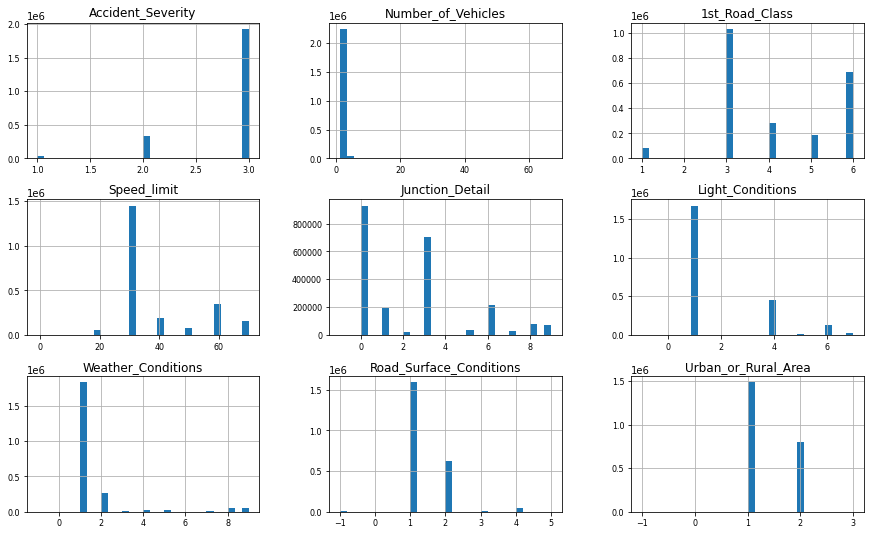

In [ ]:
# Explore the variables' distributions in the accidents data set
acc.hist(bins=30, xlabelsize=8, ylabelsize=8, figsize=(15,9));

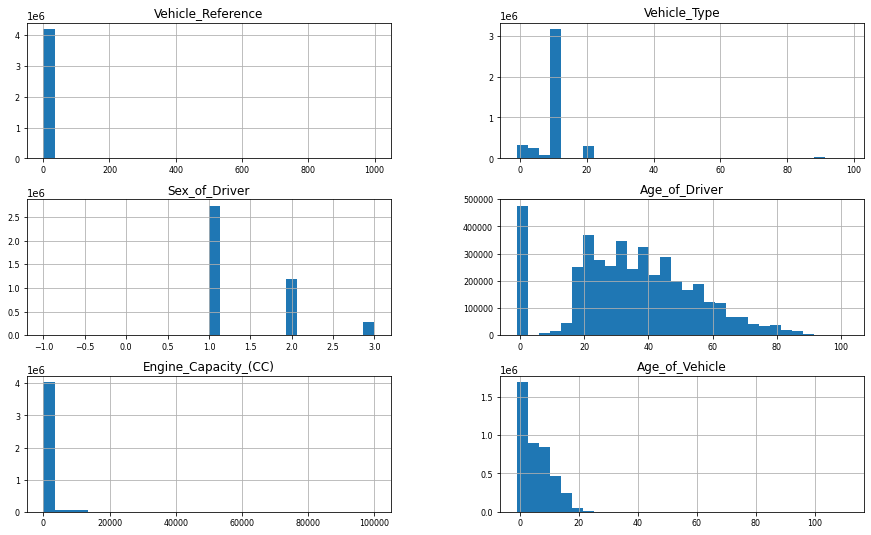

In [ ]:
# Explore the variables' distributions in the vehicles data set
veh.hist(bins=30, xlabelsize=8, ylabelsize=8, figsize=(15,9));

Somewhat unsurprising, the most accidents are caused by 25 year old people, partially the reason why car insurance and rental companies have this age threshold for their pricing policy. The majority of the accidents are caused by men, which doesn't necessarily mean that they are worse drivers than women though, because they could just on average drive more often, or there are just more male car owners in general. In fact, according to a survey conducted in 2017 in the UK, 76% of the male participants, and 69% of the female participants own a motor vehicle.

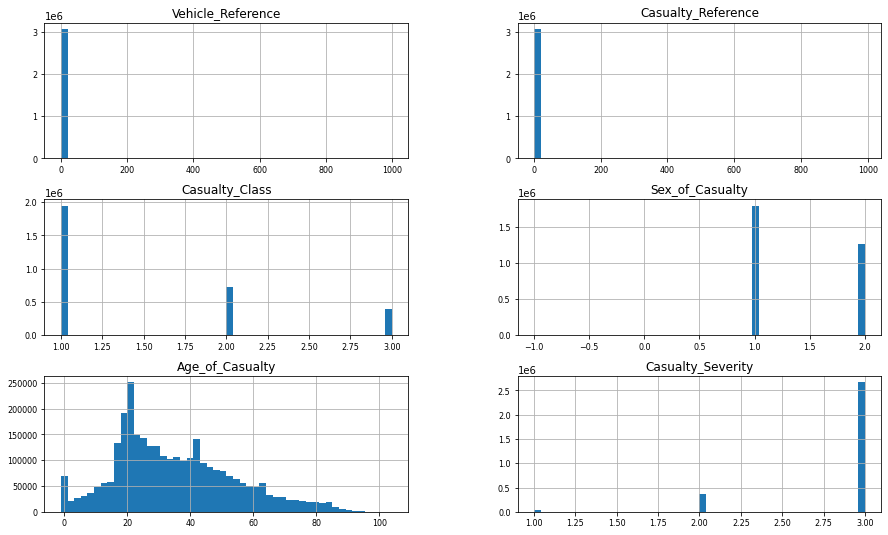

In [ ]:
# Explore the variables' distributions in the causalties data set
cas.hist(bins=50, xlabelsize=8, ylabelsize=8, figsize=(15,9));

The distribution of `Age_of_Casualty` paints a surprising picture. The peak is at around 20+ years old, which might be due to lack of experience and driving skills.

# Data Cleaning

The goal of this step is to remove erroneous records, rectify possible artifacts, and ensure that all fields have the correct data type and representation (unit, format). The value `-1` for categorical variables means **Value missing or out of range**, but we will not remove it at this point and instead consider it depending on the analysis later on. Also, the value `0` for categorical variables usually denotes *None* or *Not applicable*.

## Accidents

In [ ]:
# Take a look at the accidents data
acc.head()

,Accident_Index,Accident_Severity,Number_of_Vehicles,Date,Time,1st_Road_Class,Speed_limit,Junction_Detail,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area
0,200501BS00001,2,1,2005-01-04,17:42,3,30.0,0,1,2,2,1
1,200501BS00002,3,1,2005-01-05,17:36,4,30.0,6,4,1,1,1
2,200501BS00003,3,2,2005-01-06,00:15,5,30.0,0,4,1,1,1
3,200501BS00004,3,1,2005-01-07,10:35,3,30.0,0,1,1,1,1
4,200501BS00005,3,1,2005-01-10,21:13,6,30.0,0,7,1,2,1


In [ ]:
# Check each column individually for missing values
for col in acc.columns:
  NAs = acc[col].isna().sum()
  print('The column ',col, ' has ', NAs, ' missing values')

# Drop all accidents for which one of the crucial variables (i.e. 'Time' and 'Speed Limit') has missing values
rm_acc_idxs1 = acc[acc['Time'].isnull()]['Accident_Index']
rm_acc_idxs2 = acc[acc['Speed_limit'].isnull()]['Accident_Index']

acc = acc[~acc['Accident_Index'].isin(rm_acc_idxs1)].copy()
acc = acc[~acc['Accident_Index'].isin(rm_acc_idxs2)].copy()
cas = cas[~cas['Accident_Index'].isin(rm_acc_idxs1)].copy()
cas = cas[~cas['Accident_Index'].isin(rm_acc_idxs2)].copy()
veh = veh[~veh['Accident_Index'].isin(rm_acc_idxs1)].copy()
veh = veh[~veh['Accident_Index'].isin(rm_acc_idxs2)].copy()

print(f'Removed {rm_acc_idxs1.shape[0]} rows because of missing Time values')
print(f'Removed {rm_acc_idxs2.shape[0]} rows because of missing Speed limit')

The column  Accident_Index  has  0  missing values
The column  Accident_Severity  has  0  missing values
The column  Number_of_Vehicles  has  0  missing values
The column  Date  has  0  missing values
The column  Time  has  232  missing values
The column  1st_Road_Class  has  0  missing values
The column  Speed_limit  has  37  missing values
The column  Junction_Detail  has  0  missing values
The column  Light_Conditions  has  0  missing values
The column  Weather_Conditions  has  0  missing values
The column  Road_Surface_Conditions  has  0  missing values
The column  Urban_or_Rural_Area  has  0  missing values
Removed 232 rows because of missing Time values
Removed 37 rows because of missing Speed limit


The **`Time`** column is given as a string and formatted as `HH:MM` -- but we want it as a categorical variable which indicates the hour of a day. Hence, we first transform the **`Time`** variable into a decimal number representing hours (new column **`Time Hours`**) and then derive the categorical variable **`Hour of day`** we are after from it.
Furthermore, we extract the years, months and weekdays from the date variable, and drop every unneeded variable thereafter.

In [ ]:
## Reshape time related variables (Hour of day, Day per week, Year)

# Transform the Time variables into a decimal number representing hours and stor it within the 'Time_Hours' variable
acc['Time_Hours'] = pd.to_datetime(acc['Time'], format='%H:%M').dt.time.apply(lambda x: x.hour + x.minute/60).astype(float)

# Extract the destinct hours of a day from the 'Time_Hours' variable and store it within 'Hour_of_Day' as an object
acc['Hour_of_Day'] = acc['Time_Hours'].astype(int).astype(object)

# Extract the destinct years and store them as an object
acc['Year'] = acc['Date'].dt.year.astype(object)

# Extract the destinct months and store them as an object
acc['Month'] = acc['Date'].dt.month.astype(object)

# Extract the destinct weekdays and store them as an object
acc['Day_of_Week'] = acc['Date'].dt.weekday + 1  # 1 = Monday, 7 = Sunday
acc['Day_of_Week'].loc[acc['Day_of_Week'] == 1] = 'Monday'
acc['Day_of_Week'].loc[acc['Day_of_Week'] == 2] = 'Tuesday'
acc['Day_of_Week'].loc[acc['Day_of_Week'] == 3] = 'Wednesday'
acc['Day_of_Week'].loc[acc['Day_of_Week'] == 4] = 'Thursday'
acc['Day_of_Week'].loc[acc['Day_of_Week'] == 5] = 'Friday'
acc['Day_of_Week'].loc[acc['Day_of_Week'] == 6] = 'Saturday'
acc['Day_of_Week'].loc[acc['Day_of_Week'] == 7] = 'Sunday'

# Drop unneeded variables
acc.drop(['Time_Hours','Time','Date'], axis = 1, inplace = True)

The **`Accident_Severity`** column takes the values `1 = Fatal`, `2 = Serious`, `3 = Slight`. We transform it into a categorical variable such that it directly indicates one of these classes.

In [ ]:
# Transform 'Accident_Severity' into a categorical variable indicating each class
acc['Accident_Severity'].loc[acc['Accident_Severity'] == 1] = 'Fatal'
acc['Accident_Severity'].loc[acc['Accident_Severity'] == 2] = 'Serious'
acc['Accident_Severity'].loc[acc['Accident_Severity'] == 3] = 'Slight'

# Take a look at the distinct entries
np.unique(acc['Accident_Severity']) # We observe that no category indicating missing or out-of-range values is contained

array(['Fatal', 'Serious', 'Slight'], dtype=object)

Next, we create a dummy variable which indicates whether or not multiple vehicles were involved in the accident.

In [ ]:
# Create dummy 'Multiple_Vehicles_involved'
acc['Multiple_Vehicles_involved'] = 0
acc['Multiple_Vehicles_involved'].loc[acc['Number_of_Vehicles'] > 1] = 1

# Drop the superfluous variable
acc.drop(['Number_of_Vehicles'], axis=1, inplace=True)

The variable **`1st_Road_Class`** takes the values `1 = Motorway`, `2 = Motorways (A/M)`, `3 = Trunk Routes (A)`, `4 = Distributor Roads (B)`, `5 = Minor Roads (C)`, `6 = Unclassified Roads`. Hence, we merge categories 1 and 2 together into Motorways and relabel all the other categories accordingly.

In [ ]:
# Relabel the column into 'Road Class'
acc.rename(columns={"1st_Road_Class": "Road_Class"}, inplace = True)

# Transform 'Road Class' into a categorical variable indicating each road type
acc['Road_Class'].loc[acc['Road_Class'].isin([1,2])] = 'Motorway (A/M)'
acc['Road_Class'].loc[acc['Road_Class'] == 3] = 'Trunk Routes (A)'
acc['Road_Class'].loc[acc['Road_Class'] == 4] = 'Distributor Roads (B)'
acc['Road_Class'].loc[acc['Road_Class'] == 5] = 'Minor Roads (C)'
acc['Road_Class'].loc[acc['Road_Class'] == 6] = 'Unclassified Roads'

# Take a look at the distinct entries
np.unique(acc['Road_Class']) # We observe that no category indicating missing or out-of-range values is contained

array(['Distributor Roads (B)', 'Minor Roads (C)', 'Motorway (A/M)',
       'Trunk Routes (A)', 'Unclassified Roads'], dtype=object)

Next, we format the **`Speed_limit`** variable as desired.

In [ ]:
# Take a look at the distinct entries
print('The distinct values within the Speed_limit variables are:', np.unique(acc.Speed_limit))

# We observe that there are values contained, which indicate that the value is missing (i.e. -1 and 0)
print('To remove rows with an entry of -1 or 0, we have to remove', acc['Speed_limit'].loc[acc['Speed_limit'].isin([-1,0])].count(), 'observations')

# Drop observations with a -1 or 0 entry as the speed limit
rm_acc_idxs = acc[acc['Speed_limit'].isin([-1,0])]['Accident_Index']
acc = acc[~acc['Accident_Index'].isin(rm_acc_idxs)].copy()
cas = cas[~cas['Accident_Index'].isin(rm_acc_idxs)].copy()
veh = veh[~veh['Accident_Index'].isin(rm_acc_idxs)].copy()

# Transform the variable 'Speed_limit' into a categorical variable
acc['Speed_limit'] = acc['Speed_limit'].astype(object)

The distinct values within the Speed_limit variables are: [-1.  0. 10. 15. 20. 30. 40. 50. 60. 70.]
To remove rows with an entry of -1 or 0, we have to remove 81 observations


The variable **`Junction_Detail`** takes the values `0 = Not at junction or within 20 meters`, `1 = Roundabout`, `2 = Mini-roundabout`, `3 = T or straggered junction`, `5 = Slip road`, `6 = Crossroads`, `7 = More than 4 arms (not roundabout)`, `8 = Private drive or entrance`, `9 = Other junction`, `-1 = Data missing or out of range`. Hence, we merge categories 3, 5, 6, 7 and 9 together into 'Junction', categories 1 and 2 into 'Roundabout' and categories 0 and 8 into 'Open Street'.

In [ ]:
# Drop observations with a -1 entry in the 'Junction_Detail' variable
rm_acc_idxs = acc[acc['Junction_Detail'] == -1]['Accident_Index']
acc = acc[~acc['Accident_Index'].isin(rm_acc_idxs)].copy()
cas = cas[~cas['Accident_Index'].isin(rm_acc_idxs)].copy()
veh = veh[~veh['Accident_Index'].isin(rm_acc_idxs)].copy()
print(f'Removed {rm_acc_idxs.shape[0]} rows because of missing junction detail')

# Transform 'Junction_Detail' into a categorical variable and merge all categories as desired
acc['Junction_Detail'].loc[acc['Junction_Detail'].isin([3,5,6,7,9])] = 'Junction'
acc['Junction_Detail'].loc[acc['Junction_Detail'].isin([1,2])] = 'Roundabout'
acc['Junction_Detail'].loc[acc['Junction_Detail'].isin([0,8])] = 'Open Street'

# Take a look at the distinct entries
np.unique(acc.Junction_Detail)

Removed 2885 rows because of missing junction detail


array(['Junction', 'Open Street', 'Roundabout'], dtype=object)

Next, we format the weather and road condition related variables. Since in each of these variables an entry equal to -1 indicates that the data is missing or out of range we drop the corresponding observations.

In [ ]:
# Drop observations with a -1 entry in the 'Light_Conditions', 'Weather_Conditions' or 'Road_Surface_Conditions' variable
rm_acc_idxs1 = acc[acc['Light_Conditions'] == -1]['Accident_Index']
rm_acc_idxs2 = acc[acc['Weather_Conditions'] == -1]['Accident_Index']
rm_acc_idxs3 = acc[acc['Road_Surface_Conditions'] == -1]['Accident_Index']
acc = acc[~acc['Accident_Index'].isin(rm_acc_idxs1)].copy()
acc = acc[~acc['Accident_Index'].isin(rm_acc_idxs2)].copy()
acc = acc[~acc['Accident_Index'].isin(rm_acc_idxs3)].copy()
cas = cas[~cas['Accident_Index'].isin(rm_acc_idxs1)].copy()
cas = cas[~cas['Accident_Index'].isin(rm_acc_idxs2)].copy()
cas = cas[~cas['Accident_Index'].isin(rm_acc_idxs3)].copy()
veh = veh[~veh['Accident_Index'].isin(rm_acc_idxs1)].copy()
veh = veh[~veh['Accident_Index'].isin(rm_acc_idxs2)].copy()
veh = veh[~veh['Accident_Index'].isin(rm_acc_idxs3)].copy()
print(f'Removed {rm_acc_idxs1.shape[0]} rows because of missing light conditions')
print(f'Removed {rm_acc_idxs2.shape[0]} rows because of missing weather conditions')
print(f'Removed {rm_acc_idxs3.shape[0]} rows because of missing road surface conditions')

# Transform 'Light_Conditions' into a categorical variable indicating each class
acc['Light_Conditions'].loc[acc['Light_Conditions'] == 1] = 'Daylight'
acc['Light_Conditions'].loc[acc['Light_Conditions'] == 4] = 'Darkness - lights lit'
acc['Light_Conditions'].loc[acc['Light_Conditions'] == 5] = 'Darkness - lights unlit'
acc['Light_Conditions'].loc[acc['Light_Conditions'] == 6] = 'Darkness - no lighting'
acc['Light_Conditions'].loc[acc['Light_Conditions'] == 7] = 'Darkness - lighting unknown'

# Transform 'Weather_Conditions' into a categorical variable indicating each class
acc['Weather_Conditions'].loc[acc['Weather_Conditions'] == 1] = 'Fine & no high winds'
acc['Weather_Conditions'].loc[acc['Weather_Conditions'] == 2] = 'Raining & no high winds'
acc['Weather_Conditions'].loc[acc['Weather_Conditions'] == 3] = 'Snowing & no high winds'
acc['Weather_Conditions'].loc[acc['Weather_Conditions'] == 4] = 'Fine & high winds'
acc['Weather_Conditions'].loc[acc['Weather_Conditions'] == 5] = 'Raining & high winds'
acc['Weather_Conditions'].loc[acc['Weather_Conditions'] == 6] = 'Snowing & high winds'
acc['Weather_Conditions'].loc[acc['Weather_Conditions'] == 7] = 'Fog or mist'
acc['Weather_Conditions'].loc[acc['Weather_Conditions'].isin([8,9])] = 'Other or Unknown'

# Transform 'Road_Surface_Conditions' into a categorical variable indicating each class
acc['Road_Surface_Conditions'].loc[acc['Road_Surface_Conditions'] == 1] = 'Dry'
acc['Road_Surface_Conditions'].loc[acc['Road_Surface_Conditions'] == 2] = 'Wet or damp'
acc['Road_Surface_Conditions'].loc[acc['Road_Surface_Conditions'] == 3] = 'Snow'
acc['Road_Surface_Conditions'].loc[acc['Road_Surface_Conditions'] == 4] = 'Frost or ice'
acc['Road_Surface_Conditions'].loc[acc['Road_Surface_Conditions'] == 5] = 'Flood over 3cm. deep'
acc['Road_Surface_Conditions'].loc[acc['Road_Surface_Conditions'] == 6] = 'Oil or diesel'
acc['Road_Surface_Conditions'].loc[acc['Road_Surface_Conditions'] == 7] = 'Mud'

# Take a look at the distinct entries
print('The distinct entries in the Light_Conditions variable are:', np.unique(acc.Light_Conditions))
print('The distinct entries in the Weather_Conditions variable are:', np.unique(acc.Weather_Conditions))
print('The distinct entries in the Road_Surface_Conditions variable are:', np.unique(acc.Road_Surface_Conditions))

Removed 12 rows because of missing light conditions
Removed 191 rows because of missing weather conditions
Removed 6874 rows because of missing road surface conditions
The distinct entries in the Light_Conditions variable are: ['Darkness - lighting unknown' 'Darkness - lights lit'
 'Darkness - lights unlit' 'Darkness - no lighting' 'Daylight']
The distinct entries in the Weather_Conditions variable are: ['Fine & high winds' 'Fine & no high winds' 'Fog or mist'
 'Other or Unknown' 'Raining & high winds' 'Raining & no high winds'
 'Snowing & high winds' 'Snowing & no high winds']
The distinct entries in the Road_Surface_Conditions variable are: ['Dry' 'Flood over 3cm. deep' 'Frost or ice' 'Snow' 'Wet or damp']


Next, we format the **`Urban_or_Rural_Area`** variable into a dummy variable which takes the value 1 if an accident occurred in an Urban area, and the value 0 if the accident was located in a Rural area. The variable **`Urban_or_Rural_Area`** takes the values `-1 = data missing or out of range`, `1 = Urban`, `2 = Rural`, `3 = Unallocated`. Hence, we drop all observations where the entry is -1 or 3.

In [ ]:
# Drop observations with a -1 or 3 entry in the 'Urban_or_Rural_Area' variable
rm_acc_idxs = acc[acc['Urban_or_Rural_Area'].isin([-1,3])]['Accident_Index']
acc = acc[~acc['Accident_Index'].isin(rm_acc_idxs)].copy()
cas = cas[~cas['Accident_Index'].isin(rm_acc_idxs)].copy()
veh = veh[~veh['Accident_Index'].isin(rm_acc_idxs)].copy()
print(f'Removed {rm_acc_idxs.shape[0]} rows because of missing Urban/Rural allocation detail')

# Create dummy 'Urban_Area'
acc['Urban_Area'] = 0
acc['Urban_Area'].loc[acc['Urban_or_Rural_Area'] == 1] = 1

# Drop the superfluous variable
acc.drop(['Urban_or_Rural_Area'], axis=1, inplace=True)

Removed 240 rows because of missing Urban/Rural allocation detail


In [ ]:
acc.shape

(2276930, 14)

In [ ]:
# Take a look at the types of the columns
acc.dtypes

Accident_Index                object
Accident_Severity             object
Road_Class                    object
Speed_limit                   object
Junction_Detail               object
Light_Conditions              object
Weather_Conditions            object
Road_Surface_Conditions       object
Hour_of_Day                   object
Year                          object
Month                         object
Day_of_Week                   object
Multiple_Vehicles_involved     int64
Urban_Area                     int64
dtype: object

In [ ]:
# Take a look at the cleaned accidents data
acc.head()

,Accident_Index,Accident_Severity,Road_Class,Speed_limit,Junction_Detail,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Hour_of_Day,Year,Month,Day_of_Week,Multiple_Vehicles_involved,Urban_Area
0,200501BS00001,Serious,Trunk Routes (A),30,Open Street,Daylight,Raining & no high winds,Wet or damp,17,2005,1,Tuesday,0,1
1,200501BS00002,Slight,Distributor Roads (B),30,Junction,Darkness - lights lit,Fine & no high winds,Dry,17,2005,1,Wednesday,0,1
2,200501BS00003,Slight,Minor Roads (C),30,Open Street,Darkness - lights lit,Fine & no high winds,Dry,0,2005,1,Thursday,1,1
3,200501BS00004,Slight,Trunk Routes (A),30,Open Street,Daylight,Fine & no high winds,Dry,10,2005,1,Friday,0,1
4,200501BS00005,Slight,Unclassified Roads,30,Open Street,Darkness - lighting unknown,Fine & no high winds,Wet or damp,21,2005,1,Monday,0,1


In [ ]:
acc.isna().sum()

Accident_Index                0
Accident_Severity             0
Road_Class                    0
Speed_limit                   0
Junction_Detail               0
Light_Conditions              0
Weather_Conditions            0
Road_Surface_Conditions       0
Hour_of_Day                   0
Year                          0
Month                         0
Day_of_Week                   0
Multiple_Vehicles_involved    0
Urban_Area                    0
dtype: int64

## Causalties

In [ ]:
# Take a look at the causalties data
cas.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Casualty_Severity
0,200501BS00001,1,1,3,1,37,2
1,200501BS00002,1,1,2,1,37,3
2,200501BS00003,2,1,1,1,62,3
3,200501BS00004,1,1,3,1,30,3
4,200501BS00005,1,1,1,1,49,3


In [ ]:
# Take a look at the types of the columns
cas.dtypes

Accident_Index        object
Vehicle_Reference      int64
Casualty_Reference     int64
Casualty_Class         int64
Sex_of_Casualty        int64
Age_of_Casualty        int64
Casualty_Severity      int64
dtype: object

As we observe that everything is correctly formatted here, no additional action is required. Furthermore, we decided to not use any variables from this dataset as everything we intend to consider is contained in the accidents and vehicles dataset.

## Vehicles

In [ ]:
# Take a look at the vehicles data
veh.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle
0,200501BS00001,1,9,2,74,-1,-1
1,200501BS00002,1,11,1,42,8268,3
2,200501BS00003,1,11,1,35,8300,5
3,200501BS00003,2,9,1,62,1762,6
4,200501BS00004,1,9,2,49,1769,4


In [ ]:
# Check each column individually for missing values
for col in veh.columns:
  NAs = veh[col].isna().sum()
  print('The column ',col, ' has ', NAs, ' missing values')

The column  Accident_Index  has  0  missing values
The column  Vehicle_Reference  has  0  missing values
The column  Vehicle_Type  has  0  missing values
The column  Sex_of_Driver  has  0  missing values
The column  Age_of_Driver  has  0  missing values
The column  Engine_Capacity_(CC)  has  0  missing values
The column  Age_of_Vehicle  has  0  missing values


As we observe that there are no missing values as NAs contained in the vehicles dataset, we can safely continue with merging it with the accidents dataset.

In the next step we merge the accidents and vehicles datasets. As we assume that the vehicle of the driver that caused the accident is listed first within the vehicles dataset (i.e. those vehicles where the 'Vehicle_Reference' variable is > 1) whenever there are multiple vehicles involved in an accident, we only keep the first observation that corresponds to an accident.

In [ ]:
# Merge the entire accidents dataset with the entire vehicles dataset
merged = pd.merge(acc[acc.columns], veh[veh.columns], on = 'Accident_Index')

# Drop all rows where the 'Vehicle_Reference' variable is not equal to 1 (which are all vehicles that are not listed first)
merged = merged.loc[merged['Vehicle_Reference'] == 1]

# Drop the superfluous variable
merged.drop(['Vehicle_Reference'], axis=1, inplace=True)

In [ ]:
# Take a look at the freshly merged dataset
merged.head()

,Accident_Index,Accident_Severity,Road_Class,Speed_limit,Junction_Detail,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Hour_of_Day,Year,Month,Day_of_Week,Multiple_Vehicles_involved,Urban_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle
0,200501BS00001,Serious,Trunk Routes (A),30,Open Street,Daylight,Raining & no high winds,Wet or damp,17,2005,1,Tuesday,0,1,9,2,74,-1,-1
1,200501BS00002,Slight,Distributor Roads (B),30,Junction,Darkness - lights lit,Fine & no high winds,Dry,17,2005,1,Wednesday,0,1,11,1,42,8268,3
2,200501BS00003,Slight,Minor Roads (C),30,Open Street,Darkness - lights lit,Fine & no high winds,Dry,0,2005,1,Thursday,1,1,11,1,35,8300,5
4,200501BS00004,Slight,Trunk Routes (A),30,Open Street,Daylight,Fine & no high winds,Dry,10,2005,1,Friday,0,1,9,2,49,1769,4
5,200501BS00005,Slight,Unclassified Roads,30,Open Street,Darkness - lighting unknown,Fine & no high winds,Wet or damp,21,2005,1,Monday,0,1,3,1,49,85,10


In the next step we format the **`Vehicle_Type`** variable. We see that it contains numerous different vehicle types ranging from pedal cycle & motorcycle over cars, minibusses up to agricultural vehicles, ridden horses or trams. We decide to only consider accidents which were caused by vehicles like motorcycles and cars, as those are the most commonly driven vehicles by civilists. Furthermore, as we want to consider engine capacity as a variable in our analysis, we omit any electric car or electric motorcycle. Moreover, since the dataset distinguishes between different types of cars and motorcycles (e.g. according to their engine capacity), we merge all car type vehicles and all motorcycle type vehicles together.

In [ ]:
# Drop observations where the vehicle type is neither a car nor a motorbycicle, or not available
rm_acc = merged['Vehicle_Type'].isin([-1,1,11,16,17,18,20,21,22,23,90,97,98]).sum()
print(f'Removed {rm_acc} rows because of undesired vehicle type.')
merged = merged.loc[~merged['Vehicle_Type'].isin([-1,1,11,16,17,18,20,21,22,23,90,97,98])]

# Transform 'Vehicle_Type' into a categorical variable indicating whether the vehicle was a car or a motorcycle
merged['Vehicle_Type'].loc[merged['Vehicle_Type'].isin([2,3,4,5])] = 'Motorcycle'
merged['Vehicle_Type'].loc[merged['Vehicle_Type'].isin([8,9,10,19])] = 'Car'

# Take a look at the distinct values within the 'Vehicle_Type' variable
print(np.unique(merged['Vehicle_Type']))

Removed 245694 rows because of undesired vehicle type.
['Car' 'Motorcycle']


The variable **`Sex_of_Driver`** takes the values `-1 = Data missing or out of range`, `1 = Male`, `2 = Female` or `3 = Not known`. Hence, we drop all observations where this variable takes a value of -1 or 3.

In [ ]:
# Drop observations with a -1 or 3 entry in the 'Sex_of_Driver' variable
rm_acc = merged['Sex_of_Driver'].isin([-1,3]).sum()
print(f'Removed {rm_acc} rows because of missing gender of driver')
merged = merged.loc[merged['Sex_of_Driver'].isin([1,2])]

# Transform 'Sex_of_Driver' into a categorical variable indicating whether the driver was male or female
merged['Sex_of_Driver'].loc[merged['Sex_of_Driver'] == 1] = 'Male'
merged['Sex_of_Driver'].loc[merged['Sex_of_Driver'] == 2] = 'Female'

# Take a look at the distinct values within the 'Vehicle_Type' variable
print(np.unique(merged['Sex_of_Driver']))

Removed 121768 rows because of missing gender of driver
['Female' 'Male']


Since, beside other considerations, one of our aims is to get interpretable results (in the sense that the estimated coefficient for each variable should be comparable to the ones for the other variables), we construct reasonably chosen bins from each continuous variable in our dataset (i.e. **`Age_of_Driver`**, **`Age_of_Vehicle`**, **`Engine_Capacity_(CC)`**).

Next, we format the **`Age_of_Driver`** variable as desired. We decide to construct the following bins:

1. < 18
2. 18-20
3. 21-25
4. 26-35
5. 36-45
6. 46-55
7. 56-65
8. 66-75
9. 75+



In [ ]:
# Drop observations with a -1 entry in the 'Age_of_Driver' variable
rm_acc = (merged['Age_of_Driver'] == -1).sum()
print(f'Removed {rm_acc} rows because of missing age of driver')
merged = merged.loc[merged['Age_of_Driver'] != -1]

# Transform 'Age_of_Driver' into a categorical variable indicating each age bin
merged['Age_of_Driver'].loc[merged['Age_of_Driver'].isin(np.arange(0,18,1))] = '<18'
merged['Age_of_Driver'].loc[merged['Age_of_Driver'].isin(np.arange(18,21,1))] = '18-20'
merged['Age_of_Driver'].loc[merged['Age_of_Driver'].isin(np.arange(21,26,1))] = '21-25'
merged['Age_of_Driver'].loc[merged['Age_of_Driver'].isin(np.arange(26,36,1))] = '26-35'
merged['Age_of_Driver'].loc[merged['Age_of_Driver'].isin(np.arange(36,46,1))] = '36-45'
merged['Age_of_Driver'].loc[merged['Age_of_Driver'].isin(np.arange(46,56,1))] = '46-55'
merged['Age_of_Driver'].loc[merged['Age_of_Driver'].isin(np.arange(56,66,1))] = '56-65'
merged['Age_of_Driver'].loc[merged['Age_of_Driver'].isin(np.arange(66,76,1))] = '66-75'
merged['Age_of_Driver'].loc[merged['Age_of_Driver'].isin(np.arange(76,150,1))] = '>75'

# Take a look at the distinct values within the 'Age_of_Driver' variable
print(np.unique(merged['Age_of_Driver']))

Removed 95924 rows because of missing age of driver
['18-20' '21-25' '26-35' '36-45' '46-55' '56-65' '66-75' '<18' '>75']


Next, we format the **`Age_of_Vehicle`** variable as desired. We decide to construct the following bins:

1. 0-1
2. 2-5
3. 6-10
4. 10+


In [ ]:
# Drop observations with a -1 entry in the 'Age_of_Vehicle' variable
rm_acc = (merged['Age_of_Vehicle'] == -1).sum()
print(f'Removed {rm_acc} rows because of missing age of vehicle')
merged = merged.loc[merged['Age_of_Vehicle'] != -1]

# Transform 'Age_of_Vehicle' into a categorical variable indicating each age bin
merged['Age_of_Vehicle'].loc[merged['Age_of_Vehicle'].isin(np.arange(0,2,1))] = 'New (0-1)'
merged['Age_of_Vehicle'].loc[merged['Age_of_Vehicle'].isin(np.arange(2,6,1))] = '2-5'
merged['Age_of_Vehicle'].loc[merged['Age_of_Vehicle'].isin(np.arange(6,10,1))] = '6-10'
merged['Age_of_Vehicle'].loc[merged['Age_of_Vehicle'].isin(np.arange(10,150,1))] = '>10'

# Take a look at the distinct values within the 'Age_of_Vehicle' variable
print(np.unique(merged['Age_of_Vehicle']))

Removed 330333 rows because of missing age of vehicle
['2-5' '6-10' '>10' 'New (0-1)']


Lastly, we format the **`Engine_Capacity_(CC)`** variable as desired. We decide to construct four bins to span the usual capacity range for motorcycles and four bins to span the capacity range of cars. This strategy leads to the following eigth bins

**Motorcycles' Engine Capacity Range**
1. 0-125cc
2. 126-350cc
3. 351-600cc
4. 601-1150cc

**Cars' Engine Capacity Range**
1. 1151-1999cc
2. 2000-2999cc
3. 3000-3999cc
4. 4000cc+

In [ ]:
np.unique(merged['Engine_Capacity_(CC)'])

array([   -1,     1,     4, ..., 60000, 99102, 99999], dtype=int64)

In [ ]:
# Drop observations with a -1 entry in the 'Engine_Capacity_(CC)' variable
rm_acc = (merged['Engine_Capacity_(CC)'] == -1).sum()
print(f'Removed {rm_acc} rows because of missing engine capacity')
merged = merged.loc[merged['Engine_Capacity_(CC)'] != -1]

# Transform 'Engine_Capacity_(CC)' into a categorical variable indicating each engine capacity bin
merged['Engine_Capacity_(CC)'].loc[merged['Engine_Capacity_(CC)'].isin(np.arange(0,126,1))] = '0-125cc'
merged['Engine_Capacity_(CC)'].loc[merged['Engine_Capacity_(CC)'].isin(np.arange(126,351,1))] = '126-350cc'
merged['Engine_Capacity_(CC)'].loc[merged['Engine_Capacity_(CC)'].isin(np.arange(351,601,1))] = '351-600cc'
merged['Engine_Capacity_(CC)'].loc[merged['Engine_Capacity_(CC)'].isin(np.arange(601,1151,1))] = '601-1150cc'
merged['Engine_Capacity_(CC)'].loc[merged['Engine_Capacity_(CC)'].isin(np.arange(1151,2000,1))] = '1151-1999cc'
merged['Engine_Capacity_(CC)'].loc[merged['Engine_Capacity_(CC)'].isin(np.arange(2000,3000,1))] = '2000-2999cc'
merged['Engine_Capacity_(CC)'].loc[merged['Engine_Capacity_(CC)'].isin(np.arange(3000,4000,1))] = '3000-3999cc'
merged['Engine_Capacity_(CC)'].loc[merged['Engine_Capacity_(CC)'].isin(np.arange(4000,100000,1))] = '>4000cc'

# Take a look at the distinct values within the 'Engine_Capacity_(CC)' variable
print(np.unique(merged['Engine_Capacity_(CC)']))

Removed 613 rows because of missing engine capacity
['0-125cc' '1151-1999cc' '126-350cc' '2000-2999cc' '3000-3999cc'
 '351-600cc' '601-1150cc' '>4000cc']


In [ ]:
merged.shape

(1482372, 19)

In [ ]:
merged.isna().sum()

Accident_Index                0
Accident_Severity             0
Road_Class                    0
Speed_limit                   0
Junction_Detail               0
Light_Conditions              0
Weather_Conditions            0
Road_Surface_Conditions       0
Hour_of_Day                   0
Year                          0
Month                         0
Day_of_Week                   0
Multiple_Vehicles_involved    0
Urban_Area                    0
Vehicle_Type                  0
Sex_of_Driver                 0
Age_of_Driver                 0
Engine_Capacity_(CC)          0
Age_of_Vehicle                0
dtype: int64

In [ ]:
# Take a look at the types of the columns
merged.dtypes

Accident_Index                object
Accident_Severity             object
Road_Class                    object
Speed_limit                   object
Junction_Detail               object
Light_Conditions              object
Weather_Conditions            object
Road_Surface_Conditions       object
Hour_of_Day                   object
Year                          object
Month                         object
Day_of_Week                   object
Multiple_Vehicles_involved     int64
Urban_Area                     int64
Vehicle_Type                  object
Sex_of_Driver                 object
Age_of_Driver                 object
Engine_Capacity_(CC)          object
Age_of_Vehicle                object
dtype: object

In [ ]:
merged.head(10)

,Accident_Index,Accident_Severity,Road_Class,Speed_limit,Junction_Detail,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Hour_of_Day,Year,Month,Day_of_Week,Multiple_Vehicles_involved,Urban_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle
4,200501BS00004,Slight,Trunk Routes (A),30,Open Street,Daylight,Fine & no high winds,Dry,10,2005,1,Friday,0,1,Car,Female,46-55,1151-1999cc,2-5
5,200501BS00005,Slight,Unclassified Roads,30,Open Street,Darkness - lighting unknown,Fine & no high winds,Wet or damp,21,2005,1,Monday,0,1,Motorcycle,Male,46-55,0-125cc,>10
6,200501BS00006,Slight,Unclassified Roads,30,Open Street,Daylight,Raining & no high winds,Wet or damp,12,2005,1,Tuesday,1,1,Car,Male,46-55,2000-2999cc,New (0-1)
10,200501BS00009,Slight,Trunk Routes (A),30,Open Street,Daylight,Fine & no high winds,Dry,17,2005,1,Friday,0,1,Car,Male,66-75,>4000cc,>10
11,200501BS00010,Slight,Trunk Routes (A),30,Junction,Darkness - lights lit,Fine & no high winds,Dry,22,2005,1,Saturday,1,1,Car,Male,26-35,1151-1999cc,>10
15,200501BS00012,Slight,Trunk Routes (A),30,Junction,Darkness - lights lit,Fine & no high winds,Dry,0,2005,1,Sunday,0,1,Car,Male,26-35,1151-1999cc,6-10
16,200501BS00014,Slight,Trunk Routes (A),30,Junction,Darkness - lights lit,Fine & no high winds,Wet or damp,20,2005,1,Tuesday,1,1,Car,Female,18-20,601-1150cc,6-10
18,200501BS00015,Slight,Unclassified Roads,30,Junction,Daylight,Raining & no high winds,Wet or damp,12,2005,1,Tuesday,0,1,Car,Female,46-55,1151-1999cc,2-5
19,200501BS00016,Slight,Trunk Routes (A),30,Junction,Darkness - lights lit,Raining & no high winds,Wet or damp,5,2005,1,Tuesday,1,1,Car,Male,26-35,601-1150cc,2-5
21,200501BS00017,Slight,Trunk Routes (A),30,Open Street,Daylight,Fine & no high winds,Dry,11,2005,1,Tuesday,0,1,Motorcycle,Male,36-45,1151-1999cc,2-5


In [ ]:
merged.to_csv(r'UK_accidents_preprocessed.csv', index = False, header=True)